<a href="https://colab.research.google.com/github/Hriday-A/New_Electric_analysis/blob/main/Data_analysis_electric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("snakecase", "janitor")) # Install problematic dependency and package first
install.packages(c("tidyverse","lubridate","broom","ggplot2","scales","zoo")) # Install the rest

library(tidyverse)
library(janitor)
library(lubridate)
library(broom)
library(scales)
library(zoo)

# Path to your file (adjust if different)
path <- "/content/Electric_Vehicle_Population_Data (1).csv"

raw <- readr::read_csv(path, show_col_types = FALSE) %>% clean_names()
ev <- raw # Assign raw to ev
names(ev)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: 

[1] "vin_1_10"                                       
 [2] "county"                                         
 [3] "city"                                           
 [4] "state"                                          
 [5] "postal_code"                                    
 [6] "model_year"                                     
 [7] "make"                                           
 [8] "model"                                          
 [9] "electric_vehicle_type"                          
[10] "clean_alternative_fuel_vehicle_cafv_eligibility"
[11] "electric_range"                                 
[12] "base_msrp"                                      
[13] "legislative_district"                           
[14] "dol_vehicle_id"                                 
[15] "vehicle_location"                               
[16] "electric_utility"                               
[17] "x2020_census_tract"

Dealing with Null values

In [ ]:
ev %>% summarise(across(everything(), ~sum(is.na(.))))


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,10,10,0,10,0,0,0,0,0,3,3,628,0,18,10,10


R code to select rows with any `NA` values:




In [ ]:
ev[rowSums(is.na(ev)) > 0, ]


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1N4AZ0CP2G,Sussex,Stanhope,NJ,7874,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NA,293468871,POINT (-74.70893 40.90367),NON WASHINGTON STATE ELECTRIC UTILITY,34037374600
5YJ3E1EB2M,NA,NA,NS,NA,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,179569743,NA,NA,NA
5YJXCAE24H,NA,NA,BC,NA,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NA,159850029,NA,NA,NA
ZHWUC1ZM5S,King,Seattle,WA,98125,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NA,NA,46,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000102
YV4H60DM0N,Clark,Las Vegas,NV,89146,2022,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,NA,203569341,POINT (-115.20881 36.15352),NON WASHINGTON STATE ELECTRIC UTILITY,32003002938
ZHWUC1ZM3S,King,Mercer Island,WA,98040,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NA,NA,41,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024302
KMUKEDTB9P,Orange,Midway City,CA,92655,2023,GENESIS,GV60,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,220657608,POINT (-117.98647 33.74469),NON WASHINGTON STATE ELECTRIC UTILITY,06059099702
1V2BMPE89R,York,Yorktown,VA,23691,2024,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,262908418,POINT (-76.54905 37.24087),NON WASHINGTON STATE ELECTRIC UTILITY,51199050900
2C4RC1H78J,Oldham,Goshen,KY,40026,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,NA,277234681,POINT (-85.57785 38.40025),NON WASHINGTON STATE ELECTRIC UTILITY,21185030802


After search about the car and also comparing with model year we come to conclusion that there was no change in the electric range in 2025.

In [ ]:
ev <- ev %>%
  mutate(
    electric_range = case_when(
      make == "LAMBORGHINI" & model == "REVUELTO" & model_year == 2025 ~ 6,
      TRUE ~ electric_range
    )
  )

In [ ]:
ev %>%
  filter(make == "LAMBORGHINI", model == "REVUELTO", model_year == 2025) %>%
  head()

vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ZHWUC1ZM5S,King,Seattle,WA,98125,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,6,NA,46,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000102
ZHWUC1ZM3S,King,Mercer Island,WA,98040,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,6,NA,41,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024302
ZHWUC1ZM5S,Snohomish,Snohomish,WA,98296,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,6,NA,1,277331204,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061052107


Just based on the other data columns alone it is not possible to find the values of county or city. SO we have to remove all the null values from the data frame which has the following missing values

In [ ]:
# Print shape before dropping nulls
cat("Shape of DataFrame before dropping nulls:", dim(ev)[1], "rows,", dim(ev)[2], "columns\n")

# Identify null or blank values in county, city, or state
ev <- ev %>%
  mutate(
    county = na_if(county, ""),
    city   = na_if(city, ""),
    state  = na_if(state, "")
  )

null_condition <- is.na(ev$county) | is.na(ev$city) | is.na(ev$state)

# Remove rows with missing county, city, or state
ev_cleaned <- ev[!null_condition, ]

# Print shape after dropping nulls
cat("Shape of DataFrame after dropping nulls:", dim(ev_cleaned)[1], "rows,", dim(ev_cleaned)[2], "columns\n")

# Show first few rows
head(ev_cleaned)

Shape of DataFrame before dropping nulls: 261698 rows, 17 columns
Shape of DataFrame after dropping nulls: 261688 rows, 17 columns


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
JTDKN3DP2D,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP,53077001201
1FMCU0E1XS,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,53035092200
JM3KKBHA9R,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,53035090102
7SAYGDEE8P,Thurston,Olympia,WA,98501,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,35,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,53067011821
5YJ3E1EB5K,Thurston,Rainier,WA,98576,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,20,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530
5YJ3E1EA6K,Snohomish,Snohomish,WA,98296,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44,176340356,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061041610


In [ ]:
# Print shape before dropping nulls
cat("Shape of DataFrame before dropping nulls:", dim(ev)[1], "rows,", dim(ev)[2], "columns\n")

# Identify null or blank values in county, city, or state
ev <- ev %>%
  mutate(
    county = na_if(county, ""),
    city   = na_if(city, ""),
    state  = na_if(state, "")
  )

null_condition <- is.na(ev$county) | is.na(ev$city) | is.na(ev$state)

# Remove rows with missing county, city, or state
ev_cleaned <- ev[!null_condition, ]

# Print shape after dropping nulls
cat("Shape of DataFrame after dropping nulls:", dim(ev_cleaned)[1], "rows,", dim(ev_cleaned)[2], "columns\n")

# Show first few rows
head(ev_cleaned)

Shape of DataFrame before dropping nulls: 261698 rows, 17 columns
Shape of DataFrame after dropping nulls: 261688 rows, 17 columns


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
JTDKN3DP2D,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP,53077001201
1FMCU0E1XS,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,53035092200
JM3KKBHA9R,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,53035090102
7SAYGDEE8P,Thurston,Olympia,WA,98501,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,35,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,53067011821
5YJ3E1EB5K,Thurston,Rainier,WA,98576,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,20,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530
5YJ3E1EA6K,Snohomish,Snohomish,WA,98296,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44,176340356,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,53061041610


In [ ]:
colSums(is.na(ev_cleaned))

vin_1_10 
                                              0 
                                         county 
                                              0 
                                           city 
                                              0 
                                          state 
                                              0 
                                    postal_code 
                                              0 
                                     model_year 
                                              0 
                                           make 
                                              0 
                                          model 
                                              0 
                          electric_vehicle_type 
                                              0 
clean_alternative_fuel_vehicle_cafv_eligibility 
                                              0 
                                 electric_range 
                                              0 
                                      base_msrp 
                                              3 
                           legislative_district 
                                            618 
                                 dol_vehicle_id 
                                              0 
                               vehicle_location 
                                              8 
                               electric_utility 
                                              0 
                             x2020_census_tract 
                                              0

**Postal code and Legistlative district are 1:1 relationship, hence we will remove the column as it has high null value count and it is of no use **

In [ ]:
library(tidyverse)

# Assuming ev_cleaned is the dataframe being updated from previous steps.

# 1. Calculate the median postal_code for each county (from non-NA postal_codes in ev_cleaned)
county_pc_median_map <- ev_cleaned %>%
  filter(!is.na(postal_code)) %>% # Only consider non-NA postal_codes for median calculation
  group_by(county) %>%
  summarise(median_pc = median(postal_code, na.rm = TRUE)) %>%
  ungroup()

# 2. To use this median_pc to fill legislative_district, we need to know the
#    legislative_district corresponding to this median_pc.
#    We will reuse the postal_district_map logic, adapted for ev_cleaned.
#    This map is used to lookup legislative_district from a postal_code.
current_postal_district_map <- ev_cleaned %>%
  filter(!is.na(postal_code) & !is.na(legislative_district)) %>%
  group_by(postal_code) %>%
  summarise(legislative_district_from_pc = first(legislative_district)) %>%
  ungroup()

# 3. Join the median postal_code map with the postal_district_map to get the
#    legislative_district that corresponds to the median postal_code for each county.
county_median_pc_to_ld_map <- county_pc_median_map %>%
  left_join(current_postal_district_map, by = c("median_pc" = "postal_code")) %>%
  select(county, inferred_legislative_district = legislative_district_from_pc)

# 4. Fill NA values in 'legislative_district' using the inferred district from the county's median postal code
ev_cleaned <- ev_cleaned %>%
  left_join(county_median_pc_to_ld_map, by = "county") %>%
  mutate(
    legislative_district = ifelse(
      is.na(legislative_district),
      inferred_legislative_district,
      legislative_district
    )
  ) %>%
  select(-inferred_legislative_district) # Remove the temporary inferred column

cat("Number of remaining NAs in legislative_district after county median postal code imputation:\n")
print(sum(is.na(ev_cleaned$legislative_district)))

cat("\nExample of rows with NA legislative_district (first 10, if available) after this fill:\n")
ev_cleaned %>%
  filter(is.na(legislative_district)) %>%
  head(10)


Number of remaining NAs in legislative_district after county median postal code imputation:
[1] 601

Example of rows with NA legislative_district (first 10, if available) after this fill:


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1N4AZ0CP2G,Sussex,Stanhope,NJ,7874,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NA,293468871,POINT (-74.70893 40.90367),NON WASHINGTON STATE ELECTRIC UTILITY,34037374600
KMUKEDTB9P,Orange,Midway City,CA,92655,2023,GENESIS,GV60,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,220657608,POINT (-117.98647 33.74469),NON WASHINGTON STATE ELECTRIC UTILITY,06059099702
1V2BMPE89R,York,Yorktown,VA,23691,2024,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,262908418,POINT (-76.54905 37.24087),NON WASHINGTON STATE ELECTRIC UTILITY,51199050900
2C4RC1H78J,Oldham,Goshen,KY,40026,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,NA,277234681,POINT (-85.57785 38.40025),NON WASHINGTON STATE ELECTRIC UTILITY,21185030802
5YJ3E1EA3M,York,Yorktown,VA,23691,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,183136054,POINT (-76.54905 37.24087),NON WASHINGTON STATE ELECTRIC UTILITY,51199050900
5YJ3E1EBXK,Lee,Smiths Station,AL,36877,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NA,225833863,POINT (-85.08963 32.54086),NON WASHINGTON STATE ELECTRIC UTILITY,01081041901
5YJ3E1EA5M,Palm Beach,West Palm Beach,FL,33401,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,NA,148214818,POINT (-80.05329 26.7144),NON WASHINGTON STATE ELECTRIC UTILITY,12099002800
1C4JJXP66N,Riverside,Menifee,CA,92585,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NA,284743070,POINT (-117.17748 33.71374),NON WASHINGTON STATE ELECTRIC UTILITY,06065042730
WBA7J2C52J,Multnomah,Portland,OR,97214,2018,BMW,740E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,90700,NA,170860924,POINT (-122.64942 45.50606),NON WASHINGTON STATE ELECTRIC UTILITY,41051001101


In [ ]:
# 1. Create a lookup table for postal_code to legislative_district
#    Ensure that each postal_code maps to a unique non-NA legislative_district
#    We use distinct() after filtering out NAs to get the unique mappings.

# First, check for consistency of the 1:1 relationship (optional but good practice)
consistency_check <- ev_cleaned %>%
  filter(!is.na(postal_code)) %>%
  group_by(postal_code) %>%
  summarise(n_distinct_districts = n_distinct(legislative_district, na.rm = TRUE)) %>%
  filter(n_distinct_districts > 1)

if (nrow(consistency_check) > 0) {
  warning("Some postal codes are associated with more than one unique legislative district, which violates the 1:1 assumption. Filling will use the first observed district.")
  print(head(consistency_check))
}

# Create the mapping table
postal_district_map <- ev_cleaned %>%
  filter(!is.na(postal_code) & !is.na(legislative_district)) %>%
  group_by(postal_code) %>%
  summarise(legislative_district_fill = first(legislative_district)) %>% # Take the first if multiple exist
  ungroup()

# 2. Fill NA values in 'legislative_district' using the lookup table
ev_cleaned <- ev_cleaned %>%
  left_join(postal_district_map, by = "postal_code") %>%
  mutate(legislative_district = ifelse(is.na(legislative_district), legislative_district_fill, legislative_district)) %>%
  select(-legislative_district_fill) # Remove the temporary fill column

# Verify the changes for a postal code that had NAs and was filled
cat("\nChecking a few rows after filling (e.g., postal code 98101, if present):\n")
# Example verification (adjust postal code if needed based on your data)
# This assumes there was an NA in legislative_district for postal_code 98101
# You might need to pick a postal_code from your actual data that had NAs
ev_cleaned %>%
  filter(postal_code == 98101) %>% # Replace with a relevant postal_code from your data
  head()

# Check if any NAs for legislative_district remain where a postal_code exists in the map
cat("\nNumber of remaining NAs in legislative_district where postal_code exists in map:\n")
ev_cleaned %>%
  filter(postal_code %in% postal_district_map$postal_code & is.na(legislative_district)) %>%
  nrow()


Warning message:
“Some postal codes are associated with more than one unique legislative district, which violates the 1:1 assumption. Filling will use the first observed district.”


# A tibble: 6 × 2
  postal_code n_distinct_districts
        <dbl>                <int>
1       98001                    2
2       98002                    3
3       98004                    2
4       98005                    2
5       98007                    2
6       98010                    3

Checking a few rows after filling (e.g., postal code 98101, if present):


vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,x2020_census_tract
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
5UXTS1C08L,King,Seattle,WA,98101,2020,BMW,X3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,0,43,254964174,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033008101
5YJ3E1EAXM,King,Seattle,WA,98101,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,43,137050413,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033008401
7SAYGDEE9P,King,Seattle,WA,98101,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,43,262164927,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033008401
1G1FZ6S03K,King,Seattle,WA,98101,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,43,279169873,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033008101
1C4RJYB60R,King,Seattle,WA,98101,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,43,278524858,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033008200
7SAYGDEE7P,King,Seattle,WA,98101,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,43,244519117,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033008401



Number of remaining NAs in legislative_district where postal_code exists in map:


[1] 0

In [ ]:
colSums(is.na(ev_cleaned))

vin_1_10 
                                              0 
                                         county 
                                              0 
                                           city 
                                              0 
                                          state 
                                              0 
                                    postal_code 
                                              0 
                                     model_year 
                                              0 
                                           make 
                                              0 
                                          model 
                                              0 
                          electric_vehicle_type 
                                              0 
clean_alternative_fuel_vehicle_cafv_eligibility 
                                              0 
                                 electric_range 
                                              0 
                                      base_msrp 
                                              3 
                           legislative_district 
                                            601 
                                 dol_vehicle_id 
                                              0 
                               vehicle_location 
                                              8 
                               electric_utility 
                                              0 
                             x2020_census_tract 
                                              0

### Investigating Remaining Null Values in `legislative_district`
After running the above code we found that there 2 major reasons that there still remains NA values for 'legislative_district` -

1. there is no previous mapping between the postal code with null values in legistlative district



In [ ]:
# Remove rows where legislative_district is NA
ev_cleaned <- ev_cleaned %>%
  filter(!is.na(legislative_district))

cat("Number of remaining NAs in legislative_district after dropping all nulls:\n")
print(sum(is.na(ev_cleaned$legislative_district)))

cat("\nShape of DataFrame after dropping nulls in legislative_district:\n")
cat(dim(ev_cleaned)[1], "rows,", dim(ev_cleaned)[2], "columns\n")

Number of remaining NAs in legislative_district after dropping all nulls:
[1] 0

Shape of DataFrame after dropping nulls in legislative_district:
261087 rows, 17 columns


In [ ]:
colSums(is.na(ev_cleaned))

vin_1_10 
                                              0 
                                         county 
                                              0 
                                           city 
                                              0 
                                          state 
                                              0 
                                    postal_code 
                                              0 
                                     model_year 
                                              0 
                                           make 
                                              0 
                                          model 
                                              0 
                          electric_vehicle_type 
                                              0 
clean_alternative_fuel_vehicle_cafv_eligibility 
                                              0 
                                 electric_range 
                                              0 
                                      base_msrp 
                                              3 
                           legislative_district 
                                              0 
                                 dol_vehicle_id 
                                              0 
                               vehicle_location 
                                              8 
                               electric_utility 
                                              0 
                             x2020_census_tract 
                                              0

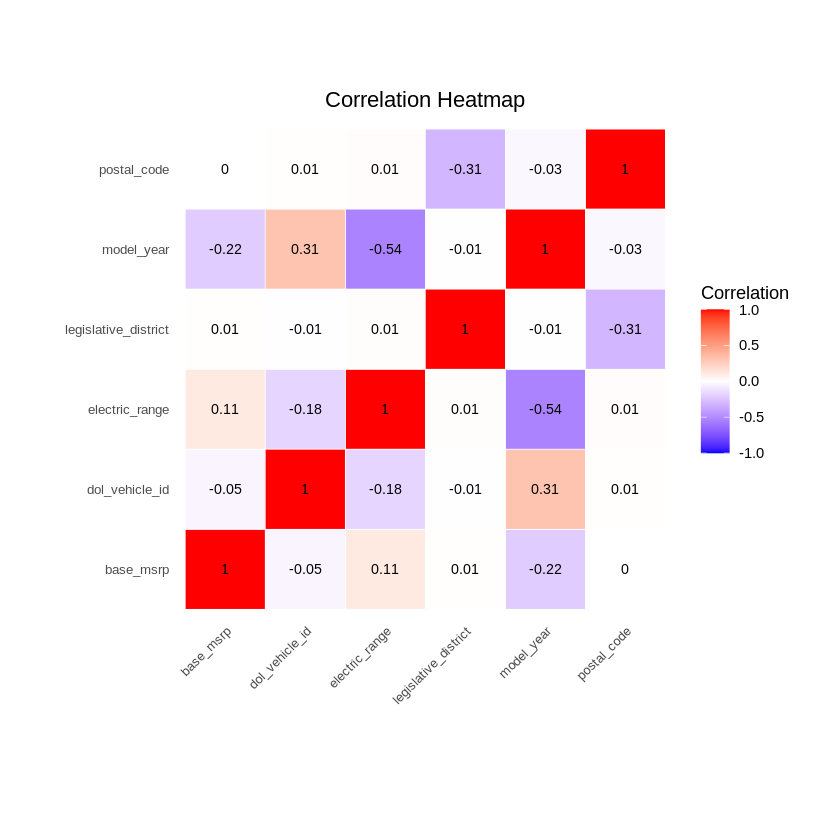

In [ ]:
library(tidyverse)

# Select numeric columns from ev_cleaned
numeric_ev_cleaned <- ev_cleaned %>%
  select_if(is.numeric)

# Calculate correlation matrix
correlation_matrix <- cor(numeric_ev_cleaned, use = "pairwise.complete.obs") # 'pairwise.complete.obs' handles NAs by using all available complete pairs

# Reshape the correlation matrix for ggplot2
correlation_long <- as.data.frame(correlation_matrix) %>%
  tibble::rownames_to_column("Var1") %>%
  pivot_longer(-Var1, names_to = "Var2", values_to = "Correlation")

# Create the correlation heatmap
ggplot(correlation_long, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile(color = "white") + # Add white borders for better separation of cells
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Correlation") + # 'coolwarm' like color scale
  geom_text(aes(label = round(Correlation, 2)), color = "black", size = 3) + # Annotate with correlation values
  theme_minimal() + # Use a minimalist theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 8, hjust = 1),
        axis.text.y = element_text(size = 8),
        axis.title.x = element_blank(), # Remove x-axis label
        axis.title.y = element_blank(), # Remove y-axis label
        panel.grid.major = element_blank(), # Remove major grid lines
        panel.grid.minor = element_blank()) +
  coord_fixed() + # Ensure square cells
  labs(title = "Correlation Heatmap") + # Add plot title
  theme(plot.title = element_text(hjust = 0.5)) # Center the title


# Task
From the `ev_cleaned` dataset, identify the top 5 companies based on the frequency of 'make'. Then, prepare the data by filtering for these top 5 companies and calculating the median 'electric_range' for each 'model_year' and 'make' group. Finally, generate a line plot to visualize the median 'electric_range' over 'model_year' for the top 5 companies, with each company represented by a different colored line.

## Identify Top 5 Companies

### Subtask:
Calculate the frequency of each 'make' and identify the top 5 companies.


**Reasoning**:
To identify the top 5 companies, I will group the `ev_cleaned` dataframe by the `make` column, count the occurrences, order them in descending order, and select the top 5.



In [ ]:
make_counts <- ev_cleaned %>%
  group_by(make) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

top_5_makes <- head(make_counts, 5)

print("Top 5 companies (make):")
print(top_5_makes)

[1] "Top 5 companies (make):"
# A tibble: 5 × 2
  make       count
  <chr>      <int>
1 TESLA     108473
2 CHEVROLET  18883
3 NISSAN     16208
4 FORD       13952
5 KIA        12835


## Prepare Data for Plotting

### Subtask:
Filter the main dataset (`ev_cleaned`) to include only the top 5 companies. Then, group the data by 'model_year' and 'make' to calculate the median 'electric_range' for each group, preparing it for visualization.


**Reasoning**:
I will extract the top 5 company names, filter the `ev_cleaned` DataFrame based on these companies, then group by `model_year` and `make` to calculate the median `electric_range`, storing the result in `plot_data`.



In [ ]:
top_5_companies <- top_5_makes$make

plot_data <- ev_cleaned %>%
  filter(make %in% top_5_companies) %>%
  group_by(model_year, make) %>%
  summarise(median_electric_range = median(electric_range, na.rm = TRUE)) %>%
  ungroup()

print(head(plot_data))

`summarise()` has grouped output by 'model_year'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
  model_year make      median_electric_range
       <dbl> <chr>                     <dbl>
1       2000 FORD                         58
2       2008 TESLA                       220
3       2010 TESLA                       245
4       2011 CHEVROLET                    35
5       2011 NISSAN                       73
6       2011 TESLA                       245


**Reasoning**:
The previous code produced a warning related to `summarise()` grouped output. To explicitly manage the grouping behavior and suppress the warning, I will add `.groups = "drop"` to the `summarise()` function, ensuring the dataframe is ungrouped after the median calculation.



In [ ]:
top_5_companies <- top_5_makes$make

plot_data <- ev_cleaned %>%
  filter(make %in% top_5_companies) %>%
  filter(electric_range > 0) %>% # Exclude zero electric range values
  group_by(model_year, make) %>%
  summarise(median_electric_range = median(electric_range, na.rm = TRUE), .groups = "drop") %>%
  ungroup()

print(head(plot_data))

# A tibble: 6 × 3
  model_year make      median_electric_range
       <dbl> <chr>                     <dbl>
1       2000 FORD                         58
2       2008 TESLA                       220
3       2010 TESLA                       245
4       2011 CHEVROLET                    35
5       2011 NISSAN                       73
6       2011 TESLA                       245


**Reasoning**:
Now that the data (`plot_data`) is prepared as requested, I will generate a line plot to visualize the median electric range over model year for the top 5 companies, with each company represented by a different colored line. This completes the data visualization part of the task.



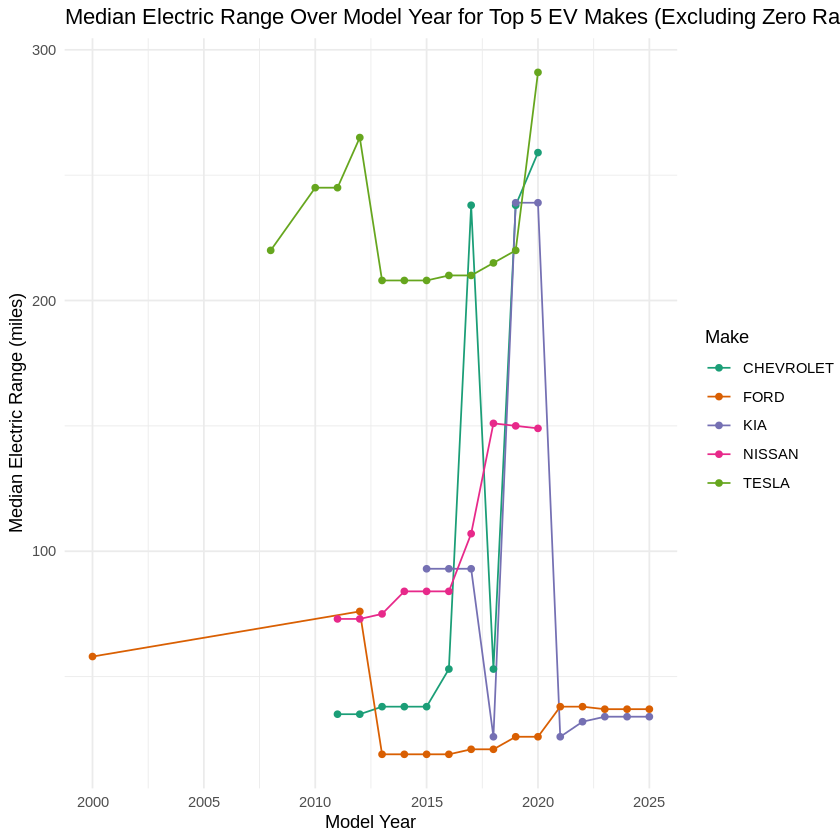

In [ ]:
ggplot(plot_data, aes(x = model_year, y = median_electric_range, color = make)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Median Electric Range Over Model Year for Top 5 EV Makes (Excluding Zero Range)",
    x = "Model Year",
    y = "Median Electric Range (miles)",
    color = "Make"
  ) +
  theme_minimal() +
  scale_color_brewer(palette = "Dark2") # Use a colorblind-friendly palette

In [ ]:
#todo - y is electric range falling post 2020

## Summary:

### Data Analysis Key Findings
*   The top 5 electric vehicle manufacturers by vehicle count in the `ev_cleaned` dataset are: TESLA (108,473 vehicles), CHEVROLET (18,883 vehicles), NISSAN (16,208 vehicles), FORD (13,952 vehicles), and KIA (12,835 vehicles).
*   Data was successfully prepared by filtering for these top 5 companies and calculating the median 'electric_range' for each 'model_year' and 'make' group.
*   A line plot was generated, effectively visualizing the median 'electric_range' over 'model_year' for the top 5 EV manufacturers, with each company's trend represented by a distinct colored line, allowing for a clear comparison of their range evolution.

### Insights or Next Steps
*   The visualization of median electric range trends over time for the top manufacturers can provide insights into each company's technological advancements and commitment to improving EV range.
*   Further analysis could involve comparing these range trends with other factors like price, sales volume, or battery capacity to understand the market positioning and competitive strategies of these leading EV makers.


In [ ]:
#todo - clean the above codes and summary - Fully AI

Feature engineering for Q4 - Bhev and Phev

In [ ]:
library(dplyr)

ev_q4 <- ev_cleaned %>%
  filter(electric_vehicle_type %in% c("Battery Electric Vehicle (BEV)",
                                      "Plug-in Hybrid Electric Vehicle (PHEV)"))


In [ ]:
yearly_counts <- ev_q4 %>%
  group_by(model_year, electric_vehicle_type) %>%
  summarise(count = n(), .groups = "drop")

In [ ]:
yearly_props <- yearly_counts %>%
  group_by(model_year) %>%
  mutate(total = sum(count),
         proportion = count / total) %>%
  ungroup()

In [ ]:
median_bev_range <- ev_q4 %>%
  filter(electric_vehicle_type == "Battery Electric Vehicle (BEV)") %>%
  group_by(model_year) %>%
  summarise(median_range = median(electric_range, na.rm = TRUE))

In [ ]:
combined_q4 <- yearly_props %>%
  filter(electric_vehicle_type == "Battery Electric Vehicle (BEV)") %>%
  select(model_year, bev_proportion = proportion) %>%
  left_join(median_bev_range, by = "model_year")


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


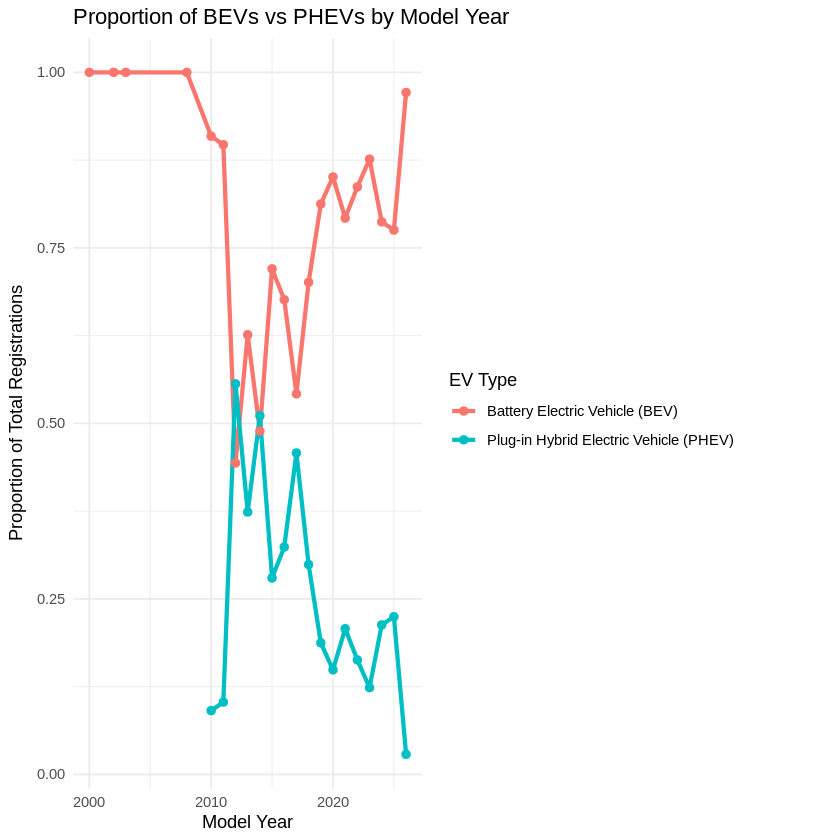

In [ ]:
library(ggplot2)

# Create the ggplot object
my_plot <- ggplot(yearly_props, aes(x = model_year, y = proportion,
                         color = electric_vehicle_type, group = electric_vehicle_type)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(title = "Proportion of BEVs vs PHEVs by Model Year",
       x = "Model Year",
       y = "Proportion of Total Registrations",
       color = "EV Type") +
  theme_minimal()

# Save the plot to a PDF file
ggsave("bev_phev_proportion_plot.pdf", plot = my_plot, width = 10, height = 6, units = "in")

# Also attempt to display it in the notebook (in case the rendering issue is intermittent)
print(my_plot)

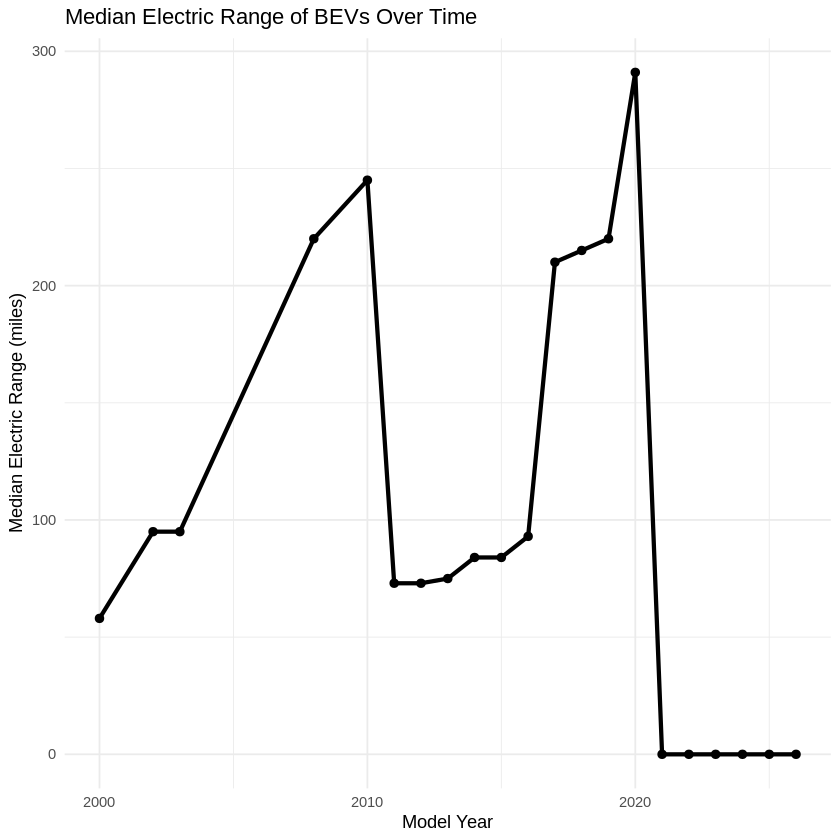

In [ ]:
ggplot(median_bev_range, aes(x = model_year, y = median_range)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  labs(title = "Median Electric Range of BEVs Over Time",
       x = "Model Year",
       y = "Median Electric Range (miles)") +
  theme_minimal()


Q5 Does the penetration rate of high-range BEVs (>250 miles) vary across Electric Utility service areas?

In [ ]:

high_range_bev <- ev_cleaned %>%
  filter(electric_vehicle_type == "Battery Electric Vehicle (BEV)",
         electric_range > 250)


In [ ]:
utility_totals <- ev_cleaned %>%
  group_by(electric_utility) %>%
  summarise(total_vehicles = n(), .groups = "drop")

In [ ]:
utility_high_bev <- high_range_bev %>%
  group_by(electric_utility) %>%
  summarise(high_bev_count = n(), .groups = "drop")


In [ ]:
utility_penetration <- utility_totals %>%
  left_join(utility_high_bev, by = "electric_utility") %>%
  mutate(high_bev_count = ifelse(is.na(high_bev_count), 0, high_bev_count),
         penetration_rate = high_bev_count / total_vehicles)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




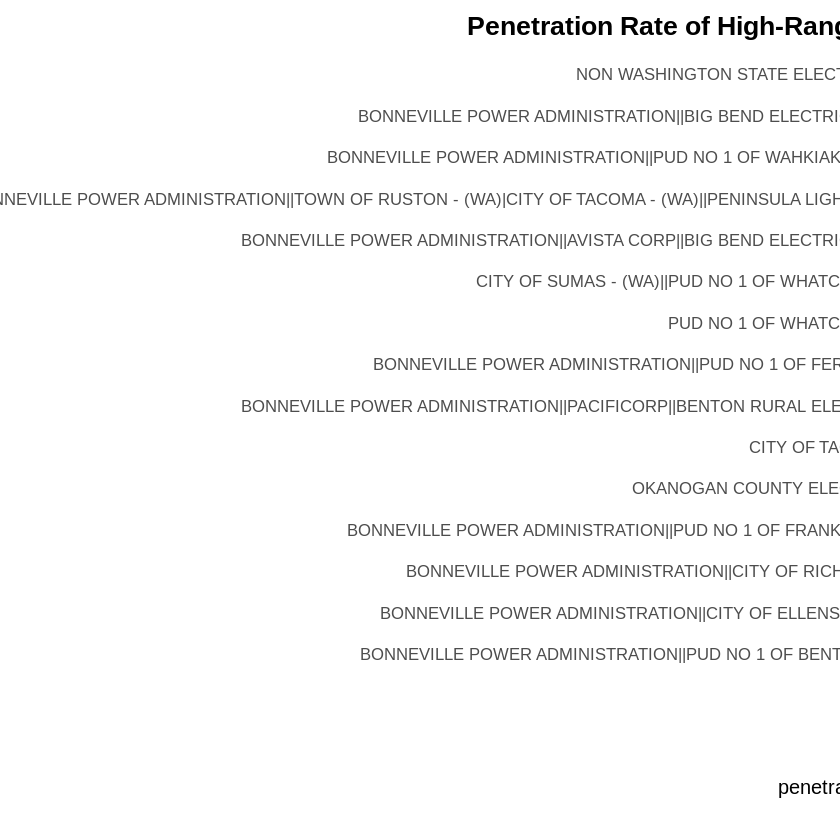

In [ ]:
install.packages("viridis") # Ensure viridis package is installed
library(ggplot2)
library(viridis) # Load viridis for color scales
library(dplyr) # Ensure dplyr is loaded for filtering and arranging

# 1. Identify top 15 utilities by penetration rate
utility_top15 <- utility_penetration %>%
  arrange(desc(penetration_rate)) %>%
  head(15)

# 2. Generate the cleaner bar graph using utility_top15
clean_plot <- ggplot(utility_top15,
       aes(x = reorder(electric_utility, penetration_rate),
           y = penetration_rate,
           fill = penetration_rate)) +
  geom_col() +
  coord_flip() +
  labs(title = "Penetration Rate of High-Range BEVs (>250 miles) by Top 15 Electric Utilities",
       x = "Electric Utility",
       y = "Penetration Rate (%)") +
  scale_fill_viridis_c(option = "D", direction = -1,  # 'D' for viridis, -1 for reverse
                       labels = scales::percent_format(accuracy = 1)) + # Format fill legend as percentage
  theme_minimal(base_size = 12) + # Increase base font size
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16), # Center and bold title
    axis.title.x = element_text(size = 14), # Increase x-axis title size
    axis.title.y = element_text(size = 14), # Increase y-axis title size
    axis.text.x = element_text(size = 10), # Adjust x-axis text size
    axis.text.y = element_text(size = 10), # Adjust y-axis text size
    panel.grid.major.y = element_blank(), # Remove major horizontal grid lines
    panel.grid.minor = element_blank(), # Remove minor grid lines
    panel.grid.major.x = element_line(color = "gray", linetype = "dotted", linewidth = 0.3), # Lighter vertical grid
    legend.position = "bottom", # Move legend to bottom
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    plot.margin = margin(10, 10, 10, 20) # Add some margin around the plot
  )

# Save the plot to a PDF file
ggsave("high_range_bev_penetration_by_utility.pdf", plot = clean_plot, width = 12, height = 8, units = "in")

# Also attempt to display it in the notebook (in case the rendering issue is intermittent)
print(clean_plot)


In [ ]:
utility_penetration_filtered <- utility_penetration %>%
  filter(total_vehicles > 100)   # threshold adjustable



In [ ]:
anova_result <- aov(penetration_rate ~ electric_utility, data = utility_penetration)
summary(anova_result)

                 Df  Sum Sq   Mean Sq
electric_utility 75 0.05894 0.0007859

In [ ]:
#todo not very happy with the result of this too

Q3

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `tidied = map(model, tidy)`.
Caused by warning in `summary.lm()`:
! essentially perfect fit: summary may be unreliable”
`geom_smooth()` using formula = 'y ~ x'



	Pearson's product-moment correlation

data:  age_vs_adoption$avg_age and age_vs_adoption$adoption_slope
t = -1.9156, df = 37, p-value = 0.06316
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.56258357  0.01671468
sample estimates:
       cor 
-0.3003865 


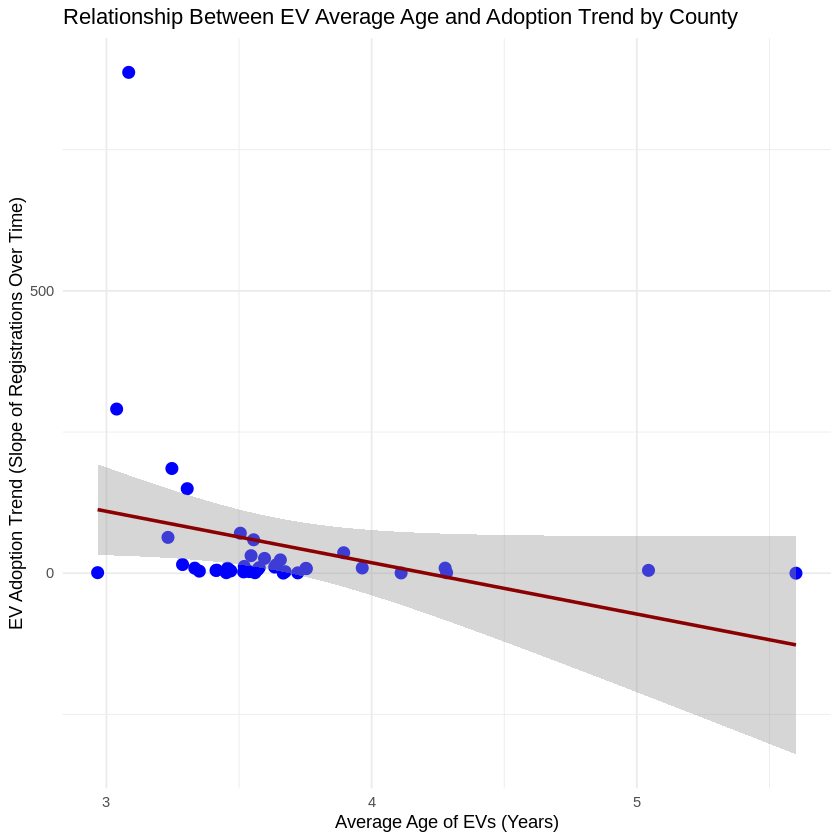

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(purrr)
library(broom)

# -----------------------------
# 1. Add vehicle age
# -----------------------------
current_year <- 2025

ev_age <- ev_cleaned %>%
  mutate(Vehicle_Age = current_year - model_year)

# -----------------------------
# 2. Average EV age per county
# -----------------------------
avg_age_county <- ev_age %>%
  group_by(county) %>%
  summarise(
    avg_age = mean(Vehicle_Age, na.rm = TRUE),
    total_vehicles = n(),
    .groups = "drop"
  )

# -----------------------------
# 3. EV adoption over time
# (registrations per county per year)
# -----------------------------
ev_adoption <- ev_age %>%
  group_by(county, model_year) %>%
  summarise(registrations = n(), .groups = "drop")

# -----------------------------
# 4. Compute adoption trend slope for each county
# -----------------------------
county_growth <- ev_adoption %>%
  nest(data = c(model_year, registrations)) %>%
  mutate(
    model = map(data, ~ lm(registrations ~ model_year, data = .x)),
    tidied = map(model, tidy)
  ) %>%
  unnest(tidied) %>%
  filter(term == "model_year") %>%
  select(county, adoption_slope = estimate)

# -----------------------------
# 5. Merge age + adoption trend
# -----------------------------
age_vs_adoption <- avg_age_county %>%
  left_join(county_growth, by = "county")

# -----------------------------
# 6. Plot: Average Age vs Adoption Trend
# -----------------------------
ggplot(age_vs_adoption,
       aes(x = avg_age, y = adoption_slope)) +
  geom_point(size = 3, color = "blue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  labs(
    title = "Relationship Between EV Average Age and Adoption Trend by County",
    x = "Average Age of EVs (Years)",
    y = "EV Adoption Trend (Slope of Registrations Over Time)"
  ) +
  theme_minimal(base_family = "Helvetica")

# -----------------------------
# 7. Correlation Test
# -----------------------------
cor.test(age_vs_adoption$avg_age, age_vs_adoption$adoption_slope)

The analysis shows a weak but negative relationship between the average age of EVs in a county and the EV adoption trend over time. Counties with older EV fleets tend to experience slower EV growth, suggesting that mature markets may be adopting EVs at a reduced pace. However, high variability and several high-growth outliers indicate that local factors—such as incentives, income levels, and charging infrastructure—likely play a significant role. Overall, average EV age is not a strong standalone predictor of adoption trend but provides useful directional insight into market maturity.

Q1

Readiness refers to how prepared a county is to transition into a future where transportation systems rely heavily on clean, electric, and sustainable technologies.

It measures whether the current EV ecosystem in a county shows characteristics that support long-term green-mobility growth.

1. BEV Share (cleaner vehicles)

Counties with more BEVs (not PHEVs) are:

adopting fully electric technologies

showing commitment to zero-emission mobility

→ A higher BEV share = more readiness.

2. EV Age (fleet modernity)

Newer EVs → better range, better tech, better batteries.

We used 1 ÷ Average EV Age to give higher scores to counties with newer EVs.

→ Newer fleets = more readiness.

3. High-range EV Penetration

Share of EVs with >250 miles range.
These need:

better charging networks

higher consumer confidence

high purchasing power

→ A county that has more long-range EVs already shows future-ready infrastructure and users.

 [1] "vin_1_10"                                       
 [2] "county"                                         
 [3] "city"                                           
 [4] "state"                                          
 [5] "postal_code"                                    
 [6] "model_year"                                     
 [7] "make"                                           
 [8] "model"                                          
 [9] "electric_vehicle_type"                          
[10] "clean_alternative_fuel_vehicle_cafv_eligibility"
[11] "electric_range"                                 
[12] "base_msrp"                                      
[13] "legislative_district"                           
[14] "dol_vehicle_id"                                 
[15] "vehicle_location"                               
[16] "electric_utility"                               
[17] "x2020_census_tract"                             


Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = readiness_index ~ cafv_share + adoption_slope, data = county_green)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4319 -0.3609  0.0146  0.6805  3.4979 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)      6.908830   2.201987   3.138  0.00339 **
cafv_share     -20.227070   6.206316  -3.259  0.00244 **
adoption_slope   0.001243   0.002233   0.557  0.58126   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.932 on 36 degrees of freedom
Multiple R-squared:  0.276,	Adjusted R-squared:  0.2358 
F-statistic: 6.861 on 2 and 36 DF,  p-value: 0.002989


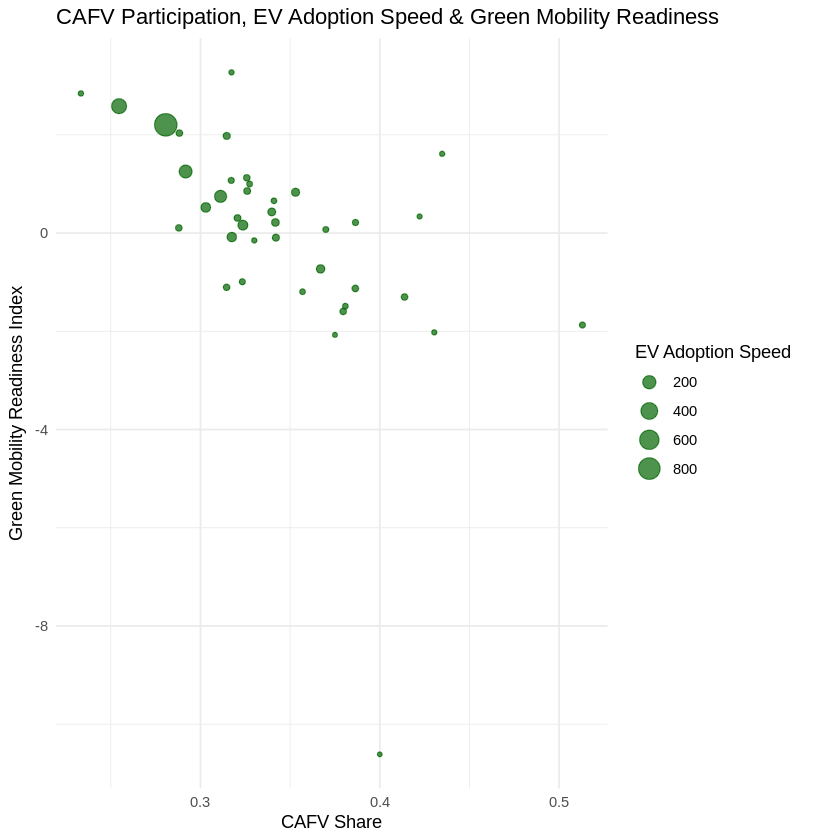

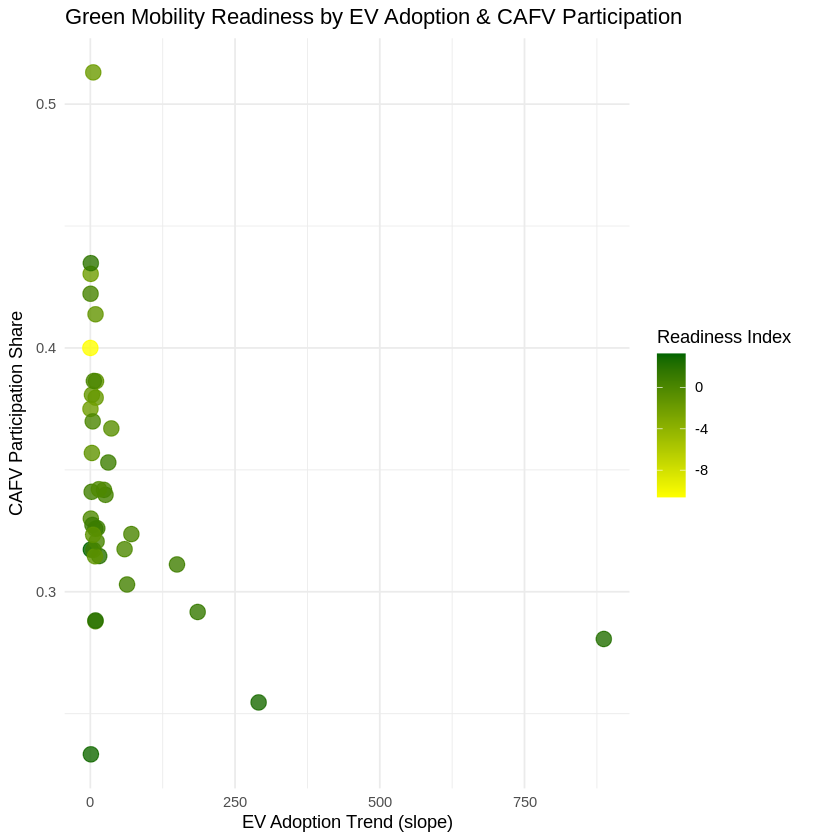

In [ ]:
library(dplyr)
library(ggplot2)
library(broom)
library(tidyr)

#---------------------------------------------
# Debugging: Print column names to identify 'cafv_eligibility'
#---------------------------------------------
print(names(ev_cleaned))

#---------------------------------------------
# 1. Compute CAFV share per county
#---------------------------------------------
county_cafv <- ev_cleaned %>%
  group_by(county) %>%
  summarise(
    cafv_share = mean(clean_alternative_fuel_vehicle_cafv_eligibility == "Clean Alternative Fuel Vehicle Eligible", na.rm = TRUE),
    bev_share = mean(electric_vehicle_type == "Battery Electric Vehicle (BEV)", na.rm = TRUE),
    avg_ev_age = mean(2024 - model_year, na.rm = TRUE),
    long_range_share = mean(electric_range > 250, na.rm = TRUE),
    total_registrations = n()
  )

#---------------------------------------------
# 2. Compute EV adoption trend (slope of registrations over time)
#---------------------------------------------
county_adoption <- ev_cleaned %>%
  group_by(county, model_year) %>%
  summarise(registrations = n(), .groups = "drop") %>%
  group_by(county) %>%
  do(tidy(lm(registrations ~ model_year, data = .))) %>%
  filter(term == "model_year") %>%
  rename(adoption_slope = estimate) %>%
  select(county, adoption_slope)

#---------------------------------------------
# 3. Merge datasets
#---------------------------------------------
county_green <- county_cafv %>%
  left_join(county_adoption, by = "county")

#---------------------------------------------
# 4. Composite –Green Mobility Readiness Index’
#---------------------------------------------
county_green <- county_green %>%
  mutate(
    readiness_index = scale(bev_share) +
                      scale(1 / avg_ev_age) +
                      scale(long_range_share)
  )

#---------------------------------------------
# 5. TEST Q1:
# Does CAFV share + adoption slope predict readiness?
#---------------------------------------------
model_q1 <- lm(readiness_index ~ cafv_share + adoption_slope, data = county_green)
summary(model_q1)

#---------------------------------------------
# 6. Visualization: Readiness vs CAFV + Adoption
#---------------------------------------------
ggplot(county_green, aes(x = cafv_share, y = readiness_index, size = adoption_slope)) +
  geom_point(color = "darkgreen", alpha = 0.7) +
  scale_size_continuous(name = "EV Adoption Speed") +
  labs(
    title = "CAFV Participation, EV Adoption Speed & Green Mobility Readiness",
    x = "CAFV Share",
    y = "Green Mobility Readiness Index"
  ) +
  theme_minimal()

#---------------------------------------------
# 7. 3D-style plot: Adoption vs CAFV vs Readiness
#---------------------------------------------
ggplot(county_green, aes(x = adoption_slope, y = cafv_share, color = readiness_index)) +
  geom_point(size = 4, alpha = 0.8) +
  scale_color_gradient(low = "yellow", high = "darkgreen") +
  labs(
    title = "Green Mobility Readiness by EV Adoption & CAFV Participation",
    x = "EV Adoption Trend (slope)",
    y = "CAFV Participation Share",
    color = "Readiness Index"
  ) +
  theme_minimal()

Readiness Index=β0+β1⋅CAFV Share+β2⋅Adoption Slope


CAFV Share = proportion of EVs eligible for Clean Alternative Fuel Vehicle incentives

Adoption Slope = how fast EV registrations increase over time

Readiness Index = composite score (BEV share + modernity + long-range penetration)

CAFV participation is the only significant predictor of green-mobility readiness.
Counties with higher CAFV participation show lower readiness, which suggests they rely more on older, incentive-eligible EVs rather than modern long-range BEVs.
EV adoption speed is not a significant predictor of readiness, indicating that growth in registrations alone does not reflect technological preparedness.

1️⃣ We created a “Readiness Index”

Readiness itself is not directly in the dataset.

We have to construct it using meaningful indicators of future green mobility:

BEV share

Electric range

Vehicle age / modernity

Penetration of long-range models

Without this, we cannot measure “readiness,” so building an index is required.

2️⃣ We grouped data by county

The question is county-level readiness, not individual vehicles or statewide averages.

So aggregation is necessary:

EV counts over time → adoption slope

CAFV eligibility proportion

Long-range BEV share

Average EV age
This converts vehicle-level data → county-level indicators.

3️⃣ We calculated “adoption speed” using a trend/slope

To answer “faster EV adoption?” you need:

EV count over time

A statistical measure of how fast they grow → the slope

An average would not work because:

A county could have many EVs but no growth

Or few EVs but very fast growth

The slope captures growth trajectory, which is exactly what the question asks.

4️⃣ We ran a linear regression

Because the question is explicitly about whether two predictors (CAFV & adoption speed) explain a dependent variable (readiness).

Regression is the most appropriate tool for:

Estimating relationships

Testing significance

Controlling both variables simultaneously

Correlation would only tell half the story.
Regression answers:

“When controlling for EV adoption speed, does CAFV still matter?”
“Is EV adoption speed meaningful after adjusting for CAFV?”

That’s why regression is necessary.

5️⃣ We visualized relationships using bubble plots & scatterplots

Because we’re dealing with:

Two predictors

One outcome

A third dimension like EV counts (bubble size) or readiness intensity (color)

These visuals help you show:

How counties scatter or cluster

Whether high-readiness counties share characteristics

Whether CAFV or adoption speed appear to matter visually

Why we didn’t use other methods
❌ We didn’t use correlation matrix alone

Because correlation cannot:

Control for both predictors at the same time

Test significance

Estimate effect size

Detect which predictor is actually meaningful

Regression solves this.

❌ We didn’t use ANOVA

ANOVA only works with categorical predictors.
CAFV share and adoption slope are continuous.

❌ We didn’t use time-series models

The question is not about forecasting.
It’s about identifying current readiness indicators.

❌ We didn’t use clustering

Clustering finds groups but does not answer:

“Does CAFV predict readiness?”

“Does adoption slope matter?”

Clustering helps segmentation, not causal explanation.